
# 🤖 Clasificación Supervisada en Salud

Este notebook muestra un ejemplo básico de aprendizaje supervisado usando un dataset de enfermedades cardíacas. Entrenaremos un modelo para predecir si un paciente tiene o no tiene enfermedad cardíaca.

## Contenido
1. Carga del dataset
2. Preprocesamiento
3. División entrenamiento/test
4. Entrenamiento de modelo (Logistic Regression)
5. Evaluación del modelo


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")


In [ ]:
url = "https://gist.githubusercontent.com/trantuyen082001/1fc2f5c0ad1507f40e721e6d18b34138/raw/heart.csv"
df = pd.read_csv(url)
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X = df.drop(columns=["output"])
y = df["output"]

X = df.drop(columns=["output"])
* Crea un nuevo DataFrame llamado X que contiene todas las columnas excepto la columna "output".
* Este será el conjunto de variables independientes, o inputs, es decir, los datos que el modelo usará para hacer sus predicciones (por ejemplo: edad, colesterol, presión…).

y = df["output"]
* Extrae la columna "output" y la guarda en y.
* Esta columna es la variable dependiente, o target, lo que el modelo intentará predecir.
* En este dataset, output probablemente indica si una persona tiene o no una enfermedad cardíaca (0 = no, 1 = sí).

**¿Por qué se hace esto?**
* Porque en un modelo supervisado necesitas decirle explícitamente:

“Estas son las variables con las que vas a aprender (X), y esta es la respuesta correcta (y).”

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Acá lo que estamos haciendo es poner todas las columnas en la misma ‘escala’.

Algunas variables pueden tener números grandes (como el colesterol o la edad), y otras pueden tener números pequeños (como proporciones o medidas normalizadas).

Si dejamos que el modelo entrene con esas diferencias tan grandes, le va a dar más importancia a las columnas con números grandes, aunque no necesariamente sean más importantes.

**¿Qué cambia?**
Si antes tenías una columna como "edad" con valores como 40, 50, 60…
Y otra columna como "presión" con valores 1.2, 1.4, 1.3…

Después del escalado, ambas van a tener valores parecidos (por ejemplo, -1 a 1), para que el modelo no se sesgue por los tamaños.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

Esta línea divide nuestros datos en dos partes: una para entrenar el modelo y otra para probar si aprendió bien.

¿Qué se está dividiendo?

X_scaled: todas las variables con las que el modelo va a aprender (las entradas)

y: la columna que queremos que el modelo aprenda a predecir (el resultado final)



**¿Qué significa cada parte?**


| Parte             | Qué hace                                                                                                          |
| ----------------- | ----------------------------------------------------------------------------------------------------------------- |
| `test_size=0.2`   | Usa el 20% de los datos para **evaluar**, y el 80% para **entrenar**                                              |
| `random_state=42` | Asegura que la división sea **siempre igual** (útil para reproducir resultados)                                   |
| `stratify=y`      | Se asegura de que **la proporción de clases (0 y 1)** sea parecida en ambos grupos (importante si hay desbalance) |


In [14]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


*1. model = LogisticRegression(max_iter=1000)*

Acá estoy creando un modelo de regresión logística, que es uno de los más simples y usados para clasificación binaria (por ejemplo: ¿esta persona tiene una enfermedad o no?).

* Es como decir: “Voy a usar esta técnica de aprendizaje”.
* max_iter=1000 significa que le damos más oportunidades para aprender si los datos son complejos.

2. model.fit(X_train, y_train)

Acá le enseño al modelo con los datos de entrenamiento:
le muestro los síntomas (X_train) y le digo cuál fue el resultado real (y_train).
* El modelo aprende patrones entre variables y resultados.
* Por ejemplo: personas con ciertas combinaciones de edad, colesterol y presión tienden a tener o no tener la condición.

3. y_pred = model.predict(X_test)

Y ahora le muestro nuevos pacientes (X_test) que nunca había visto, y le pido que me diga qué cree que va a pasar con ellos.
* El modelo hace predicciones (0 o 1).
* Esa respuesta se guarda en y_pred.

In [15]:
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



**Resumen general:**

| Métrica                     | Resultado                                          |
| --------------------------- | -------------------------------------------------- |
| Accuracy (exactitud global) | **0.80** → el modelo acierta en 8 de cada 10 casos |


Análisis por clase:

Clase 0 (por ejemplo, personas con la enfermedad):
* Precision: 0.86 → cuando el modelo dice “tiene la enfermedad”, acierta el 86% de las veces.
* Recall: 0.68 → de todos los que realmente tenían la enfermedad, solo detectó el 68%.
* F1-score: 0.76 → rendimiento moderado, penalizado por ese recall bajo.

El modelo se le están escapando muchos positivos reales de la clase 0. Esto podría ser grave si estamos hablando de diagnósticos médicos.

Clase 1 (por ejemplo, personas sanas):
* Precision: 0.77 → de los que el modelo dijo “están sanos”, acertó el 77%.
* Recall: 0.91 → detectó correctamente al 91% de los sanos.
* F1-score: 0.83 → balanceado y bastante sólido.

El modelo prefiere no equivocarse con los sanos, pero eso significa que es más conservador con los enfermos.

Promedios:
* Macro avg: promedio simple entre clases → F1 = 0.80
* Weighted avg: ajusta por la cantidad de casos en cada clase → también 0.80



# **Conclusión final:**
* El modelo tiene buen desempeño general (80%), pero hay un desequilibrio importante: es mucho mejor detectando a los sanos que a los enfermos.

* Si la clase 0 es la más importante (como en medicina), sería recomendable:
  - Ajustar el umbral de decisión
  - Probar otro modelo
  - O usar técnicas para aumentar el recall de la clase 0

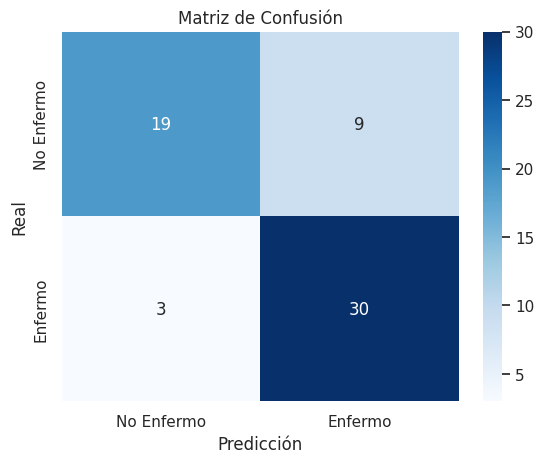

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Enfermo", "Enfermo"], yticklabels=["No Enfermo", "Enfermo"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


# **Análisis de la Matriz de Confusión**

**¿Qué nos dice esta matriz?**

Detecta correctamente a la mayoría de los enfermos:
→ 30 personas enfermas fueron correctamente clasificadas.

Tiene algunos errores al clasificar sanos:
→ 9 personas no enfermas fueron clasificadas erróneamente como enfermas.

Solo se le escaparon 3 enfermos reales (falsos negativos), lo cual es aceptable, aunque siempre preocupante en contextos clínicos.

**Métricas clave implícitas**
* Recall (para enfermos) ≈ 30 / (30 + 3) ≈ 0.91
→ El modelo detecta al 91 % de los enfermos reales.
* Precision (para enfermos) ≈ 30 / (30 + 9) ≈ 0.77
→ De todos los que dijo que estaban enfermos, el 77 % realmente lo estaban.

# Conclusión final

El modelo está priorizando detectar a los enfermos (alto recall), lo cual es bueno si estamos en un contexto de salud donde es mejor “prevenir que curar”.

Sin embargo, está generando algunos falsos positivos (gente sana que el modelo clasifica como enferma), lo que podría implicar más exámenes innecesarios o ansiedad para esas personas.